In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv("review_data.csv")

In [3]:
df.drop(['Id'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 39.0+ MB


In [5]:
df['ReviewText']=df['ReviewText'].apply(lambda x: re.sub('<.*?>','',x))

## Distribution of Ratings

<AxesSubplot:xlabel='Score', ylabel='count'>

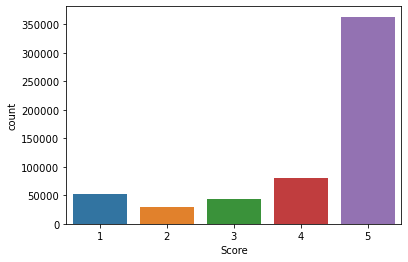

In [6]:
sns.countplot(df['Score'])

In [7]:
df['Score'].value_counts(normalize=True)

5    0.638789
4    0.141885
1    0.091948
3    0.075010
2    0.052368
Name: Score, dtype: float64

In dataset **5** rating reviews are above 60% and **2** reting reviews are less

### **Popular words in Positive Reviews (4-5 Rating)**

In [8]:
df_positive = df.loc[df['Score'].isin([4,5])]

In [9]:
stop_word = stopwords.words('english')

In [10]:
def preprocess(raw_text):
    text = str(raw_text).lower()
    tokens = word_tokenize(text)
    
    tokens = [word for word in tokens if word not in stop_word]
    word_corpus = ' '.join(tokens)
    
    return word_corpus

In [11]:
pos_array=np.array(df_positive['ReviewText'])

In [12]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [13]:
s=[]
for i in tqdm(pos_array[0:100000]):
    s.append(preprocess(i))

  0%|          | 0/100000 [00:00<?, ?it/s]

In [14]:
words=' '.join(s)
repeat =["product","'s",'one']
cleaned_words = " ".join([word for word in words.split()
                         if word not in repeat])

In [15]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='w', bbox_inches='tight')

In [16]:
pos_wordcloud = WordCloud(background_color='black',
                         width=1600,
                         height=800).generate(cleaned_words)

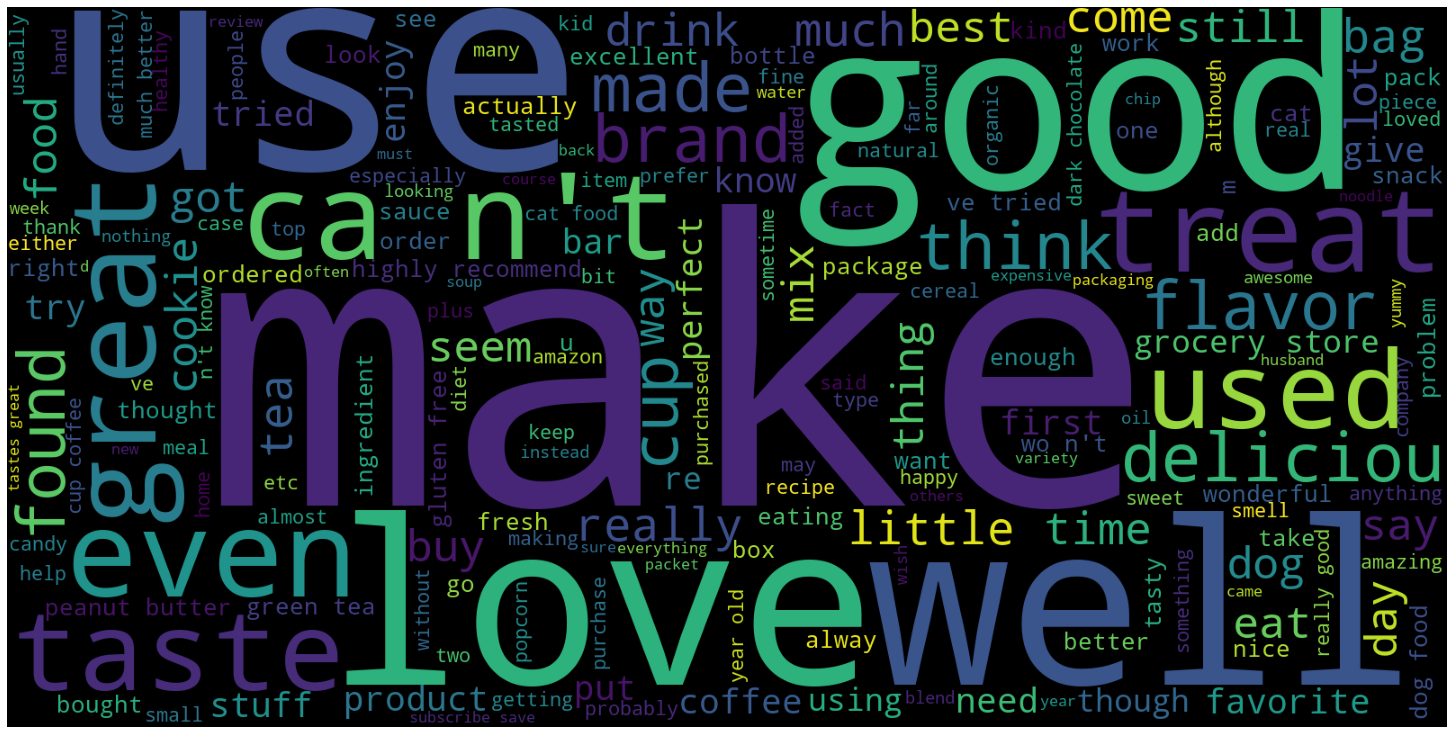

<Figure size 432x288 with 0 Axes>

In [17]:
plot_Cloud(pos_wordcloud)

## Popular words in Negative Reviews(1-2 Rating)

In [18]:
df_negative = df.loc[df['Score'].isin([1,2])]
neg_array=np.array(df_negative['ReviewText'])
s=[]
for i in tqdm(neg_array[0:100000]):
    s.append(preprocess(i))
words=' '.join(s)
repeat=["product","'s",'one']
cleaned_words = " ".join([word for word in words.split()
                         if word not in repeat])

  0%|          | 0/82037 [00:00<?, ?it/s]

In [19]:
neg_wordcloud = WordCloud(background_color='black',
                         width=1600,
                         height=800
                         ).generate(cleaned_words)

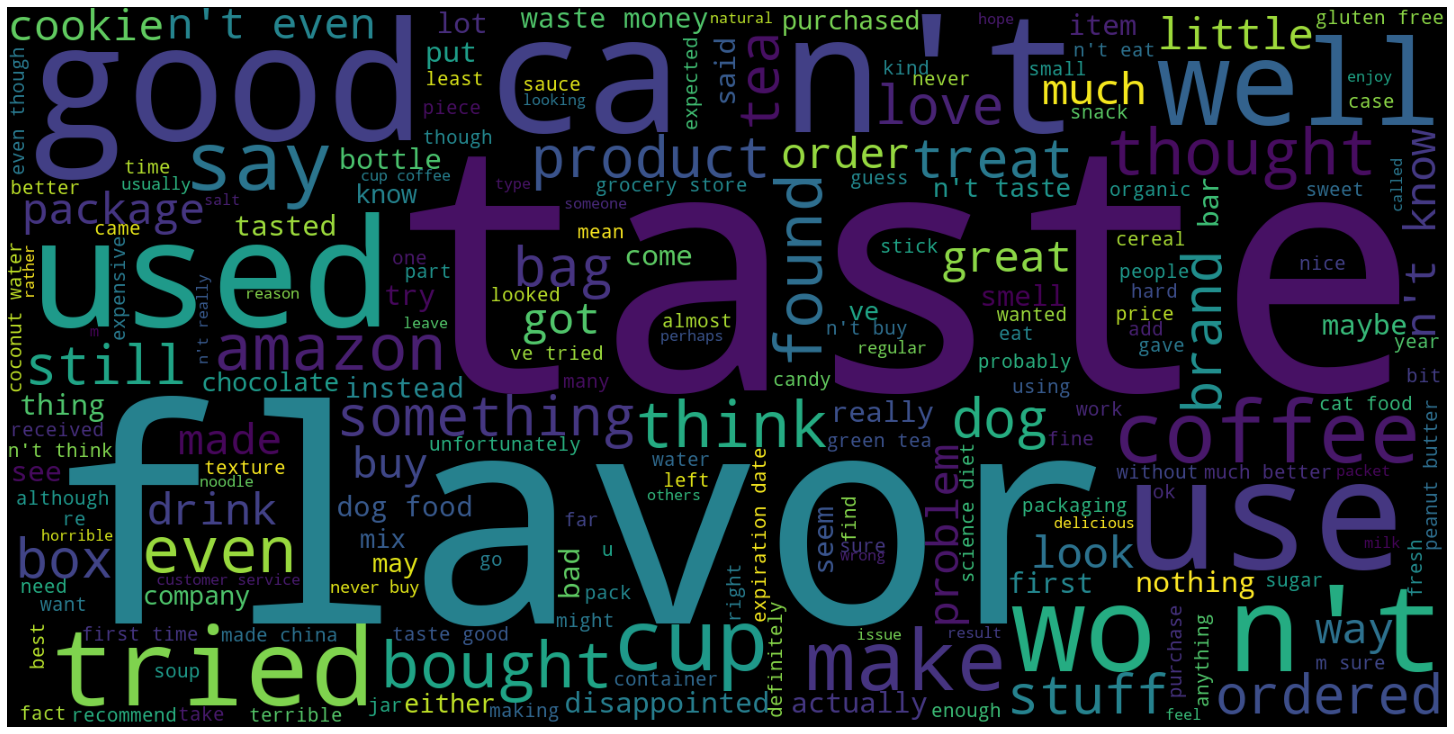

<Figure size 432x288 with 0 Axes>

In [20]:
plot_Cloud(neg_wordcloud)

## Distribution of Helpfulness

In [22]:
df["Usefulness"] = (df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]).apply(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and n <= 0.75 else "useless")))

In [23]:
df['Usefulness'].value_counts(normalize=True)

useless    0.475064
>75%       0.356820
25-75%     0.100775
<25%       0.067341
Name: Usefulness, dtype: float64

<AxesSubplot:xlabel='Usefulness', ylabel='count'>

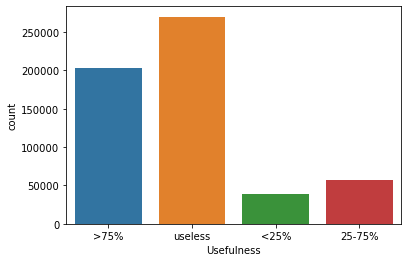

In [24]:
sns.countplot(df["Usefulness"])

Helpfulness Numerator - number of users who found the review helpful

Helpfulness Denominator - number of users who indicated whether they found the review helpful or not

Useless --- No people voted review is helpful are nor

.>75% ----- Helpful

<25% ----- No Helpful

among all almost 50% eviews are not voted
and in voted reviews, helpful reviews are high

## How does rating affect Helpfulness ?

<AxesSubplot:xlabel='Score', ylabel='count'>

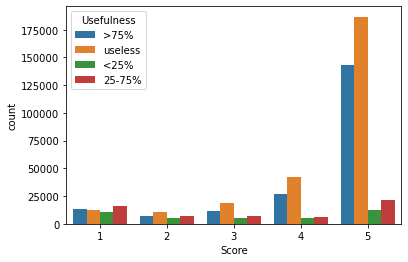

In [25]:
sns.countplot(x=df['Score'],hue=df['Usefulness'])

positive rating reviews are more helpful

## How does word count vary by rating ?

In [27]:
df['word_count']= df['ReviewText'].apply(lambda x: len(x.split()))

In [28]:
df.groupby('Score').median()['word_count']

Score
1    62
2    66
3    69
4    64
5    51
Name: word_count, dtype: int64

In [29]:
df.groupby('Score').mean()['word_count']

Score
1    86.044214
2    88.708119
3    94.032176
4    89.880751
5    73.159175
Name: word_count, dtype: float64

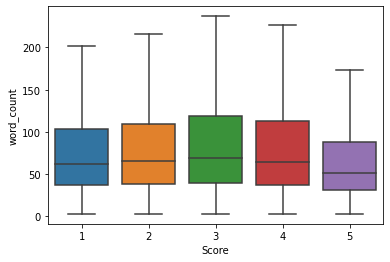

In [31]:
sns.boxplot(x='Score',y='word_count', data=df, showfliers=False)
plt.show()

for 5 rating reviews the word count median is less 51
for 3 rating reviews the word count median is high 69